# **Exploratory Analysis, Feature Engineering, and Regression Modeling**

## **Context**
Cars4U is a start-up that will buy and sell used cars leveraging the advantages of machine learning. The business needs to manage the uncertainities in used car pricing and provide the market with a satisfactory pricing model for both sellers and buyers. To attract buyers and sellers, we need to be able to set the correct price of a user car that maximizes the profit for the business.  

### **The objectives:**

 Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

**The key questions:**

- What are the predictors of the price? 



**The problem formulation**:

- We are trying to build regression models that will help predict prices based on what we know about the used car.


## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

# **Exploratory Analysis** 

### **Loading libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#Import libraries to build linear model for statistical analysis and prediction
#import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

from sklearn.model_selection import train_test_split

#Metrics to evaluate the model
from sklearn import metrics

#for tuning the model
from sklearn.model_selection import GridSearchCV
# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### **Read used car csv dataset**

In [2]:
data = pd.read_csv("..\\Public_Datasets\\used_cars.csv")

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### **Observations and Insights: **

We have twelve independent variables in the data: five categorical and seven numerical. 

### **Let us check the data types and and missing values of each column** 

In [350]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [5]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

#### **Observations and Insights: **

We have 6,019 observations with price not null. To be used as predictors, we would need to impute missing values for Mileage (2), Engine (46), Power (175), Seats (53) and New Price (6247).  

`S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [6]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns=['S.No.'], inplace=True)


## **Exploratory Data Analysis**



Summary statistics of numeric variables

In [37]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log
count,7252.000000,7252.000000,7250.00000,7206.000000,7077.000000,7199.000000,1006.000000,6018.000000,7252.000000,6018.000000
mean,2013.364865,57810.852868,18.14188,1616.382459,112.744692,5.280456,22.779692,9.470243,10.760299,1.824705
std,3.254365,37499.537277,4.56244,595.105530,53.469461,0.809327,27.759344,11.165926,0.714036,0.873606
min,1996.000000,171.000000,0.00000,72.000000,34.200000,2.000000,3.910000,0.440000,5.141664,-0.820981
25%,2011.000000,34000.000000,15.17000,1198.000000,75.000000,5.000000,7.885000,3.500000,10.434116,1.252763
50%,2014.000000,53404.000000,18.16000,1493.000000,94.000000,5.000000,11.570000,5.640000,10.885641,1.729884
75%,2016.000000,73000.000000,21.10000,1968.000000,138.100000,5.000000,26.042500,9.950000,11.198215,2.297573
max,2019.000000,775000.000000,33.54000,5998.000000,616.000000,10.000000,375.000000,160.000000,13.560618,5.075174


Observations and Insights:
- 75% of the cars were made on or after 2011. The mean value is 2013.  
- The mean km driven is 59KM. 
- The minimum value for mileage is 0. There appears to be some bad data since that is impossible unless the car isn't running.
- Most engines are are close to 1,500CC with some outliers. 
- The power looks similar to the engine in terms of spread. 
- Most of the cars have 5 seats. 
- The mean new price is over 2 times greater than the mean price for a used car. 




### **Summary statistics of all categorical variables and the number of unique observations in each category**

In [8]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts(normalize=True))
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                        0.007583
Maruti Swift VDI                              0.006756
Maruti Swift Dzire VDI                        0.005791
Honda City 1.5 S MT                           0.005377
Maruti Swift VDI BSIV                         0.005101
                                                ...   
Toyota Corolla Altis Aero D 4D J              0.000138
Mahindra KUV 100 D75 K8 5Str                  0.000138
BMW 1 Series 118d Sport Line                  0.000138
Maruti Swift Dzire LXi                        0.000138
Skoda Superb 2009-2014 Elegance 2.0 TDI MT    0.000138
Name: Name, Length: 2041, dtype: float64
--------------------------------------------------
For column: Location
Mumbai        0.130842
Hyderabad     0.120778
Kochi         0.106439
Coimbatore    0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Locati

**Number of unique observations in each category**

In [9]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].nunique())
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


**Observations and Insights:**
- There are many unique names. Also, in future predictions, there will be new names not trained in the model. 
- All eleven locations have at least some data. 
- Fuel Type is mostly Diesel or Petrol. Very few cars are CNG, LPG, or electric. 
- Over 70% of the observations have manual transmissions. 
- Over 80% of the cars are first owners. 

**Check Kilometers_Driven extreme values**

In [10]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


**Observations and Insights:**

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.


In [11]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(data.index[2328], inplace=True)

**Check Mileage extreme values**

In [13]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage').head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [14]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

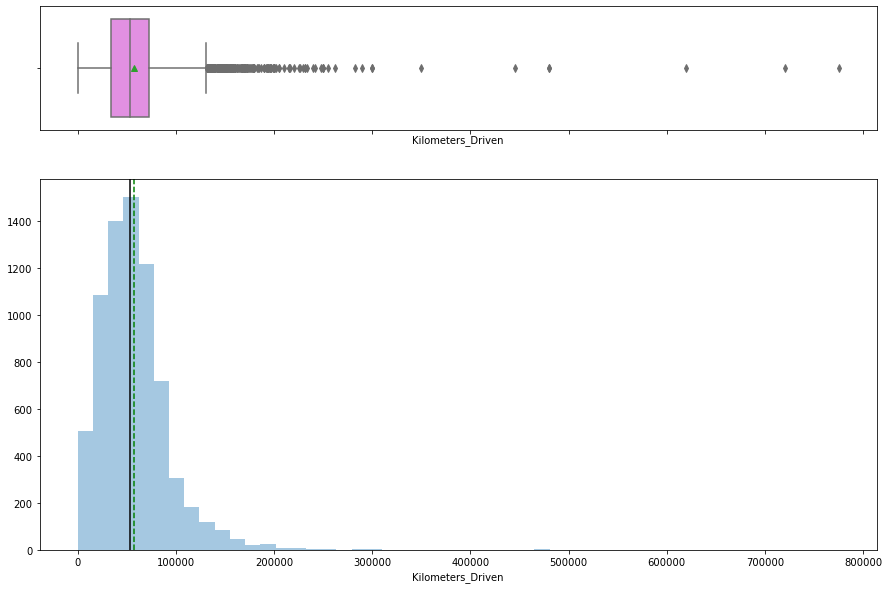

In [15]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

Kilometers_Driven is highly right-skewed.

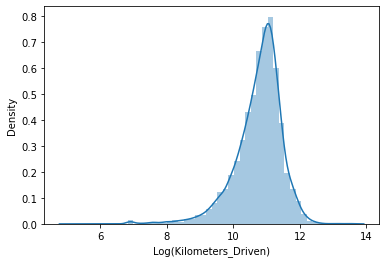

In [16]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

**Observations and Insights:**

Log transfrom of Kilometers Driven gives a more normal distribution. This will allow us to use this feature in a regression model. 

In [17]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

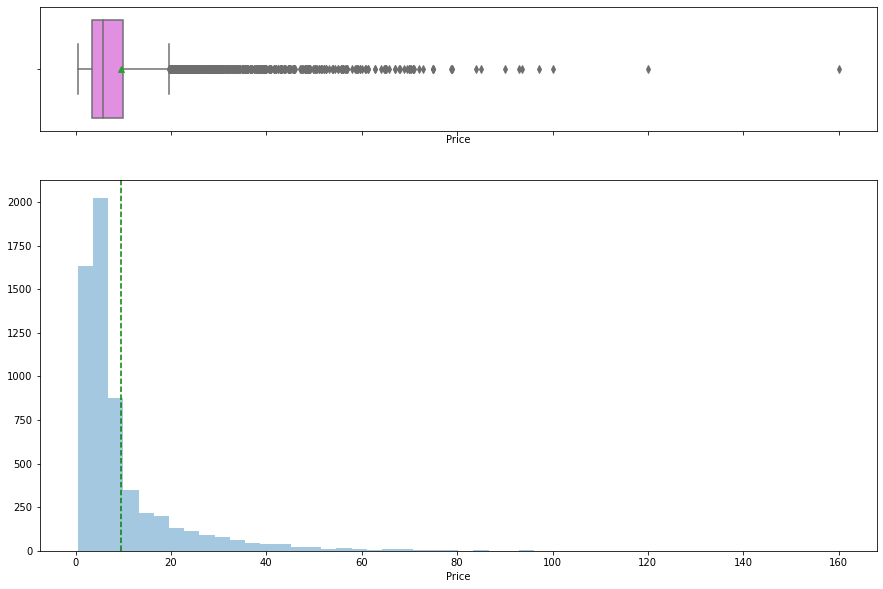

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

In [19]:
# Log transformation of the feature 'Price'
data["price_log"] = np.log(data["Price"])


#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

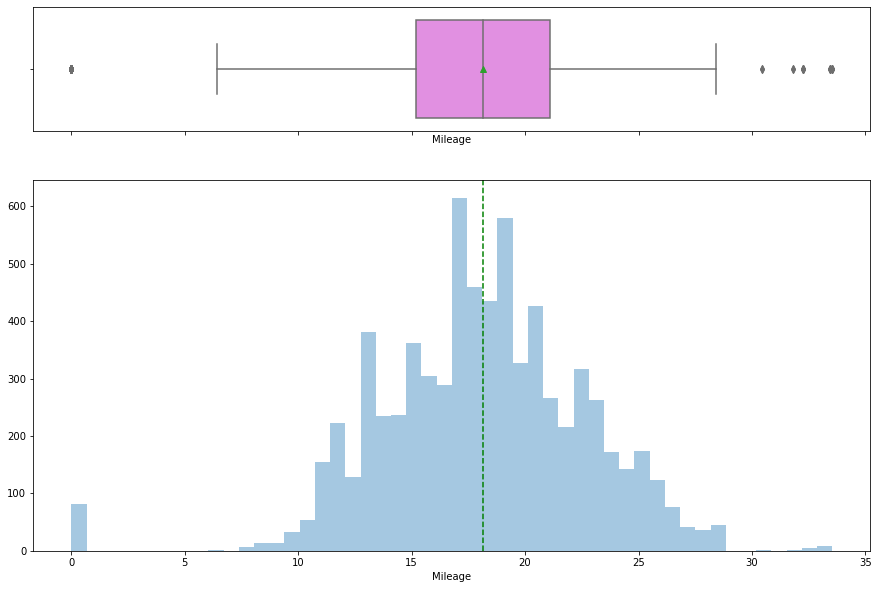

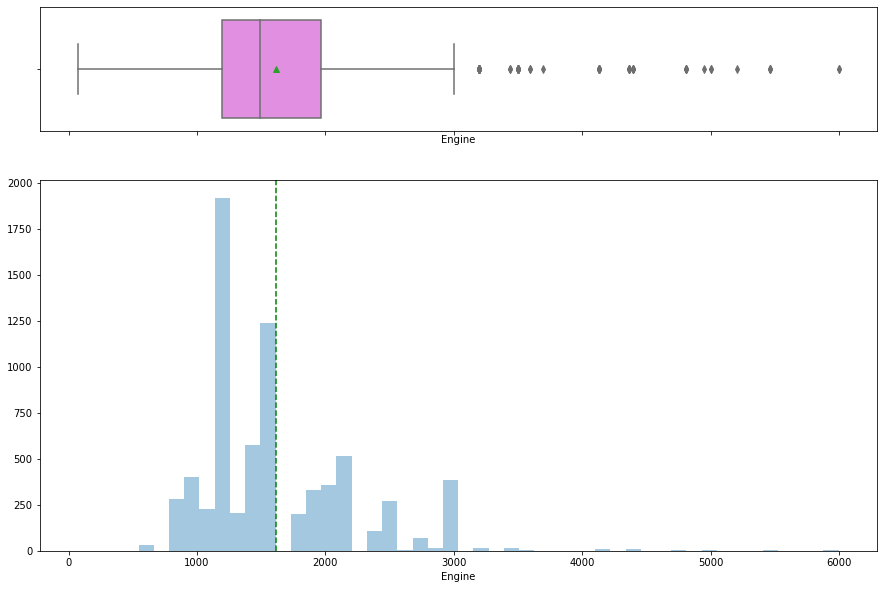

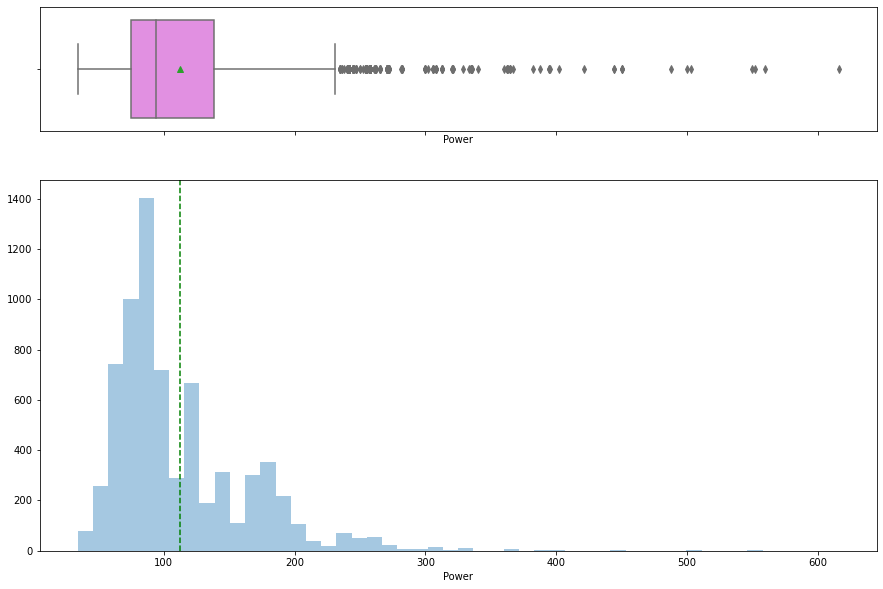

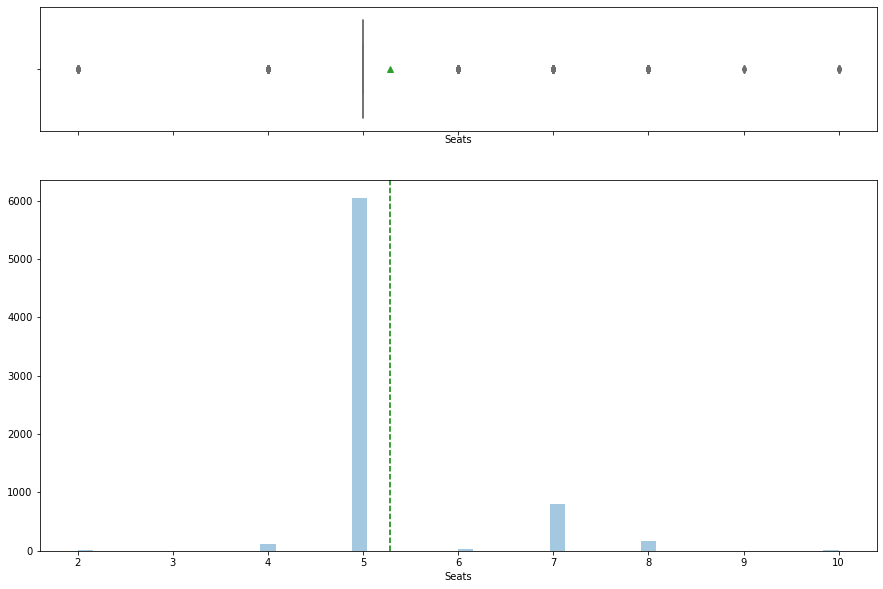

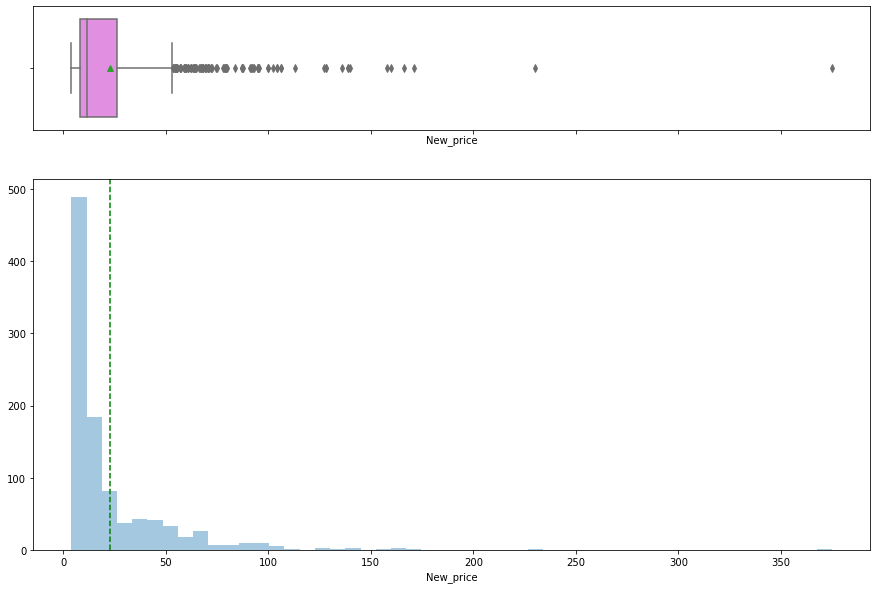

In [20]:
histogram_boxplot(data['Mileage'])
histogram_boxplot(data['Engine'])
histogram_boxplot(data['Power'])
histogram_boxplot(data['Seats'])
histogram_boxplot(data['New_price'])


**Observations and Insights for all the plots**

- Many of the variables are right-skewed: Kilometers_Driven, Price, New_price, Power, and Engine. We transformed Kilometers_Driven and Price and they are now normally distributed. 
- We have ~80 values for Price at 0 and that is not possible. 
- Seats are categorical and not numeric. 


## **2. Univariate analysis - Categorical Data**

In [21]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Plot barplot for location. It will be helpful to know the number of percentage of cars from each city.

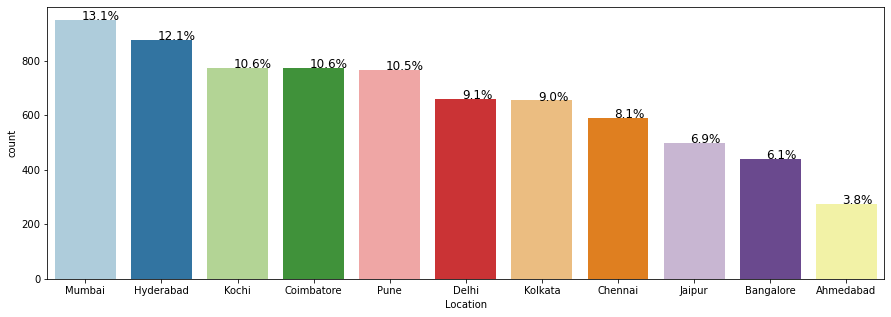

In [22]:
#Bar Plot for 'Location'
perc_on_bar('Location')

Year, Fuel_Type, Transmission, Owner_Type`

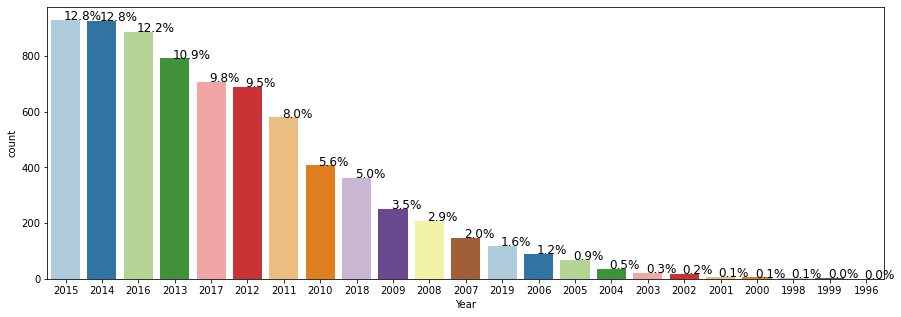

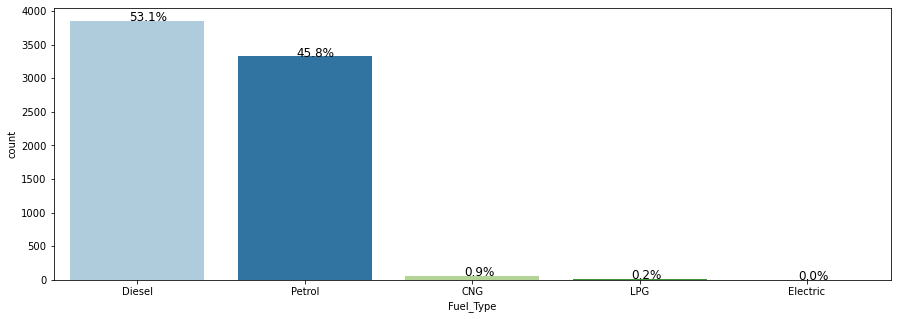

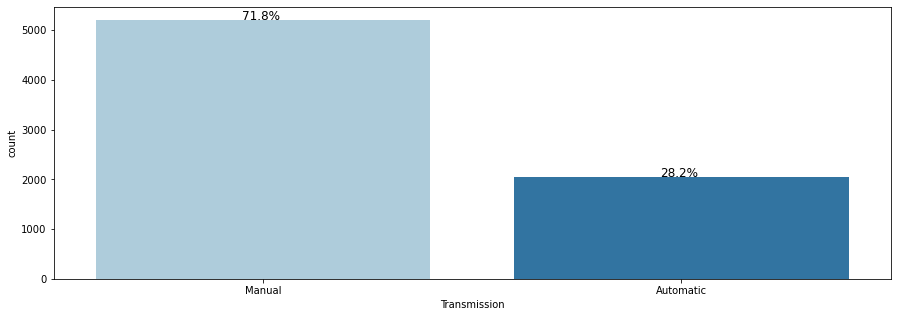

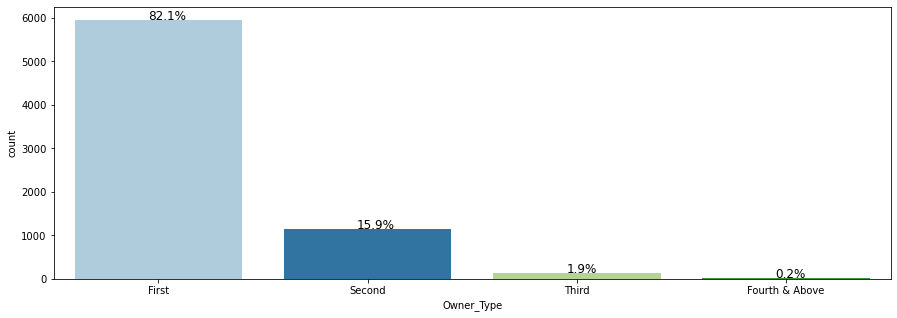

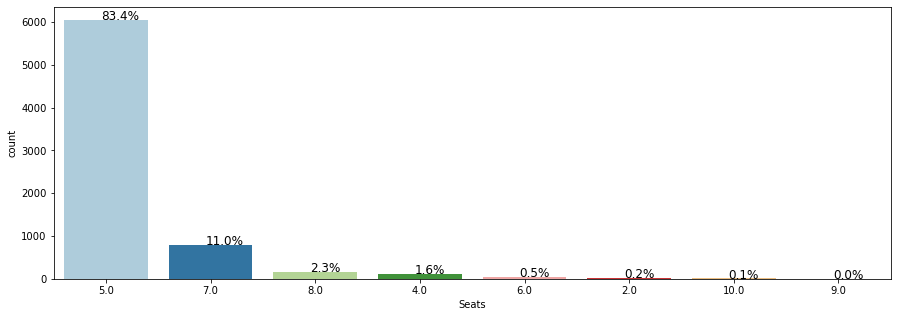

In [23]:
perc_on_bar('Year')
perc_on_bar('Fuel_Type')
perc_on_bar('Transmission')
perc_on_bar('Owner_Type')
perc_on_bar('Seats')


**Observations and Insights from all plots**

- All 11 locations are well-represented in the data. 
- Years before 2006 are not frequent in the data. This may need be treated numerically. 
- Alternative fuel types are not well-represented. 
- There are not many 2-seater cars in India. If we use this numerically, we need to watch how it tests out with 2-seaters since those may be luxury cars. 

## **Bivariate Analysis**

### **1. Scatter plot using Pairplot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

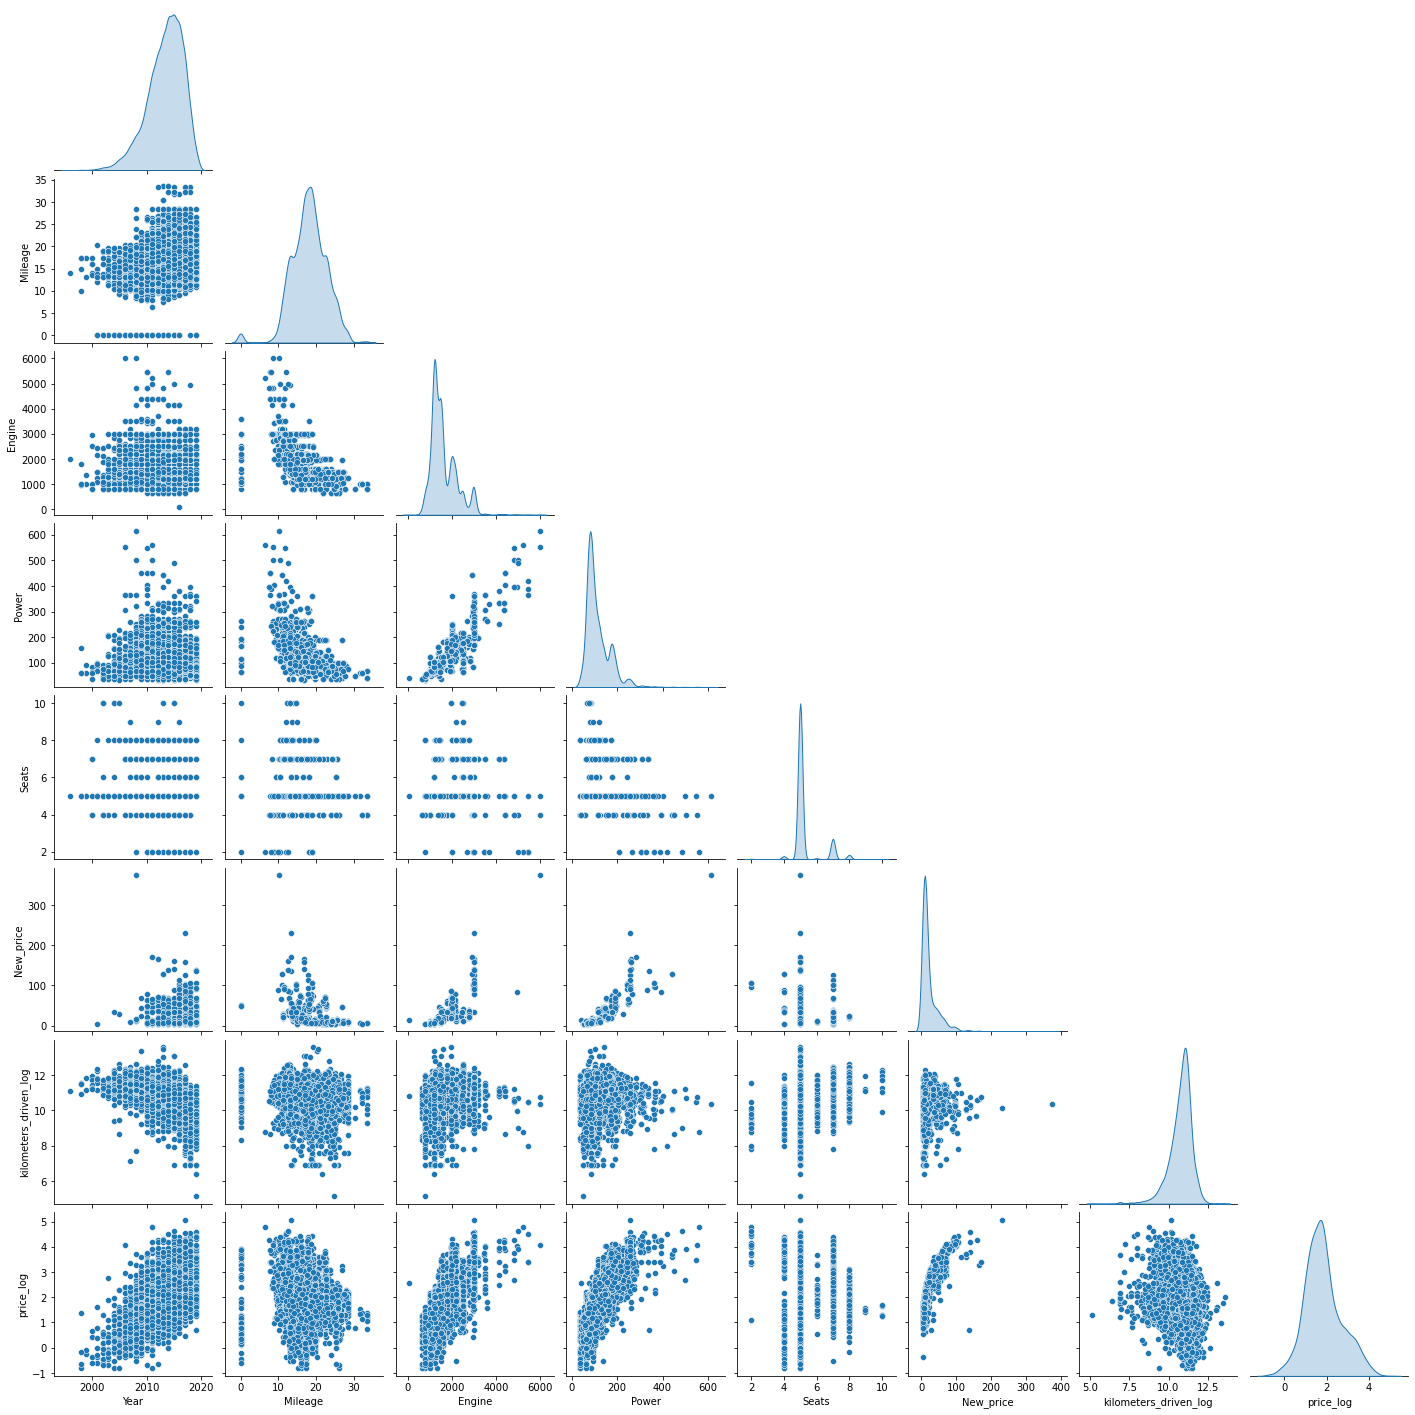

In [38]:
sns.pairplot(data.drop(['Kilometers_Driven','Price'],axis=1), diag_kind='kde', corner=True);

#### **Observations and Insights from all plots: **

- Newer used cars sell for more.  
- It doesn't appear that new prices increase with time
- Power and Engine have a positive relationship with some variation. 


### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

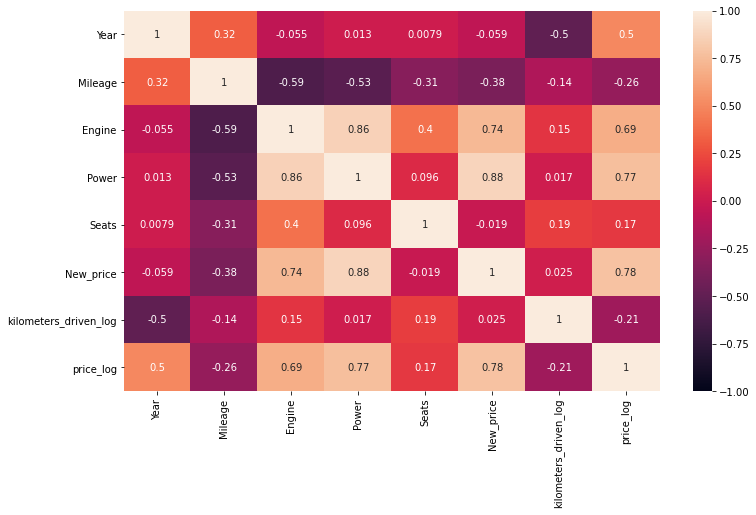

In [26]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven', 'Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights: **

- Strong correlation exists between Power and Engine. We need to be aware of multicollinearity. 
- Strong correlations exists between New Price and both Power and Engine. 
- The Price is positively correlated with New Price, Power/Engine, and Year. 

### **3. Box plot**

In [27]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

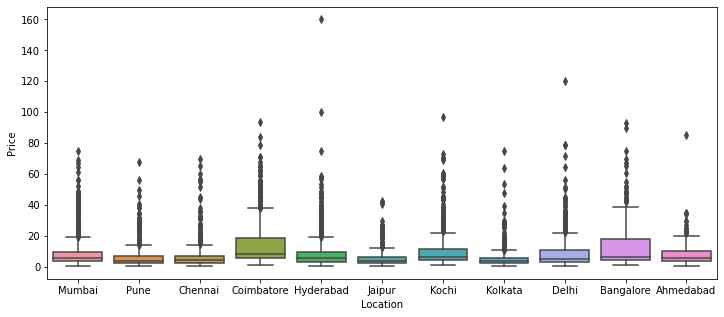

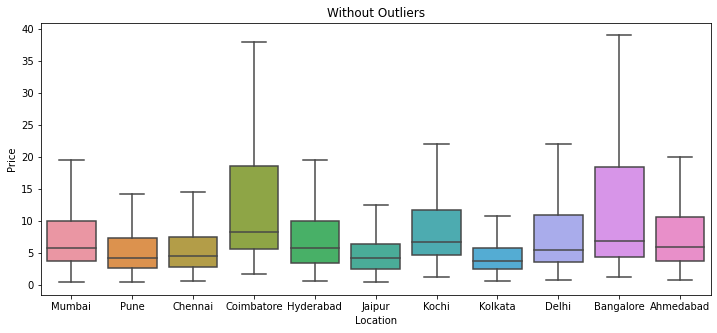

In [28]:
#Box Plot:Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

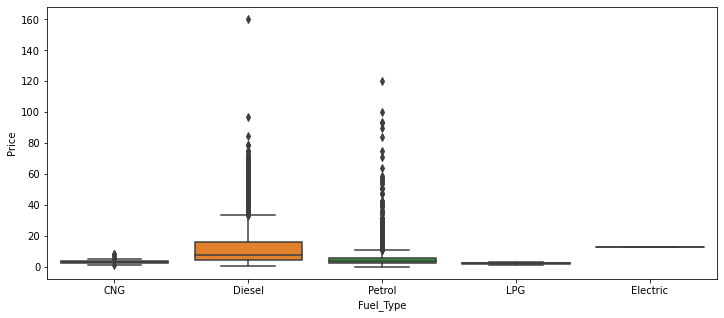

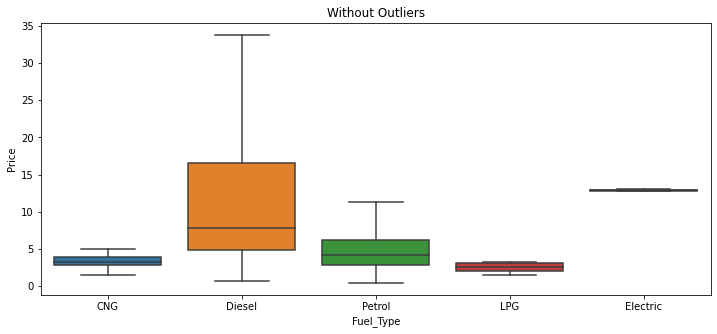

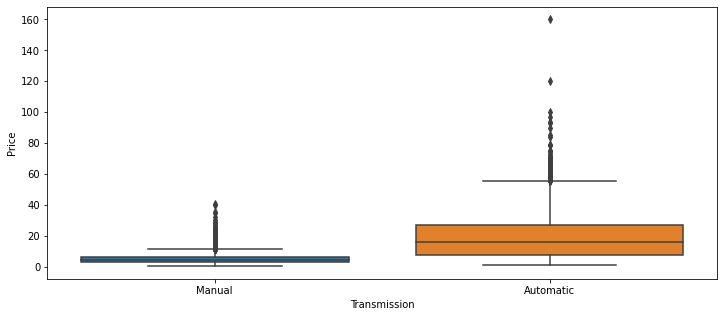

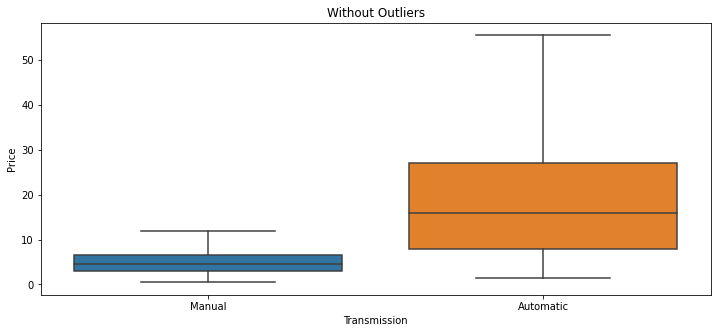

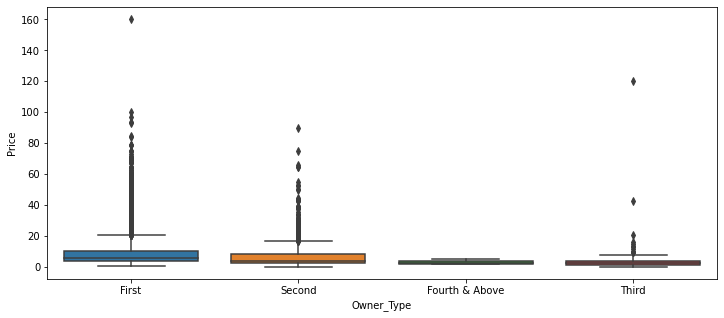

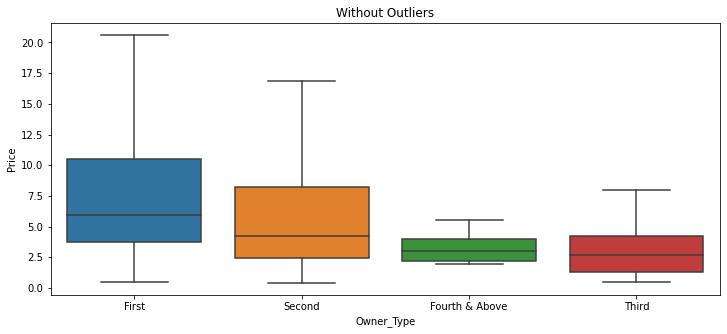

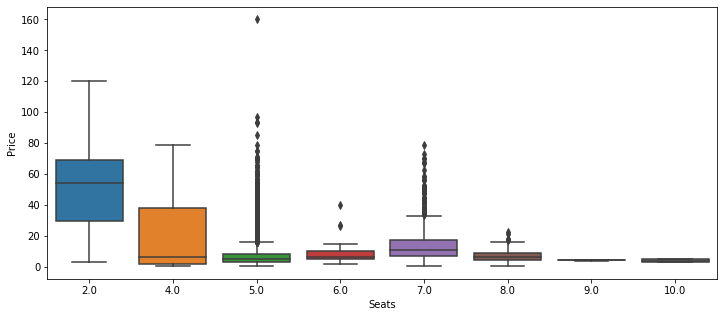

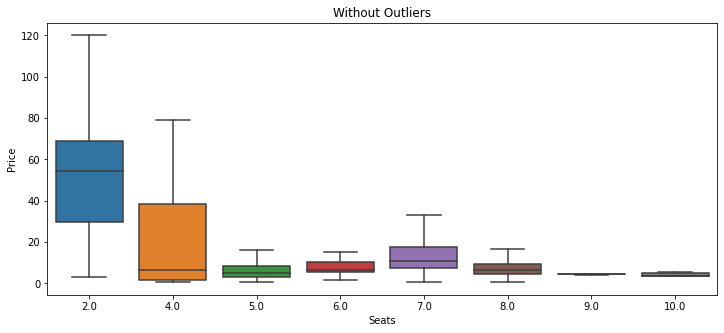

In [29]:
boxplot(data['Fuel_Type'])
boxplot(data['Transmission'])
boxplot(data['Owner_Type'])
boxplot(data['Seats'])

**Observations and Insights for all plots**
- We need to impute missing values for five variables.
- Name isn't useful and will need to be split.
- Location has 11 unique values. 
- There are only a few cars before 2006 and they become more infrequent as the year decreases. 
- Kilometers Driven was log transformed and the log variable has a normal distribution.
- Used cars running on diesel sell higher on average than petrol cars. There are not many observations with alternative fuel types.
- Used cars with automatic transmissions sell for more than automatic. 
- Over 80% of used cars are first owner types and they sell for more than cars with more owners
- Mileage has a moderately negative relationship with Price.
- Engine and Power are highly correlated and both have a positive relationship with Price 
- Most cars have 5 seats. We see that cars with two seats have higher prices than any other number of seats but there are very few observations. 



### **Feature engineering**

The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [30]:
data['Brand'] = data["Name"].apply(lambda x: x.split(" ")[0].lower())
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())


In [31]:
data["Model"].value_counts()

swift        418
city         318
i20          303
innova       203
verna        200
            ... 
land           1
fortwo         1
cls-class      1
beetle         1
venture        1
Name: Model, Length: 218, dtype: int64

### **Missing value treatment**

In [32]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

#### **Observations and Insights: **

We have 5 variables with missing data and also have Mileage with 0 values. 

**Missing values in Seats**

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name


In [35]:
# Impute missing values in Seats,you can use fillna method in pandas
fillValue = data[data['Name'].str.contains('City 1.5 GXI')].filter(items=['Seats']).median()
print('Median for City 1.5: ', fillValue[0])
data.loc[data['Name'].str.contains('City 1.5 GXI'), 'Seats'] = data.loc[data['Name'].str.contains('City 1.5 GXI'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Name'].str.contains('Figo Diesel')].filter(items=['Seats']).median()
print('Median for Figo Diesel: ', fillValue[0])
data.loc[data['Model'].str.contains('Figo Diesel'), 'Seats'] = data.loc[data['Model'].str.contains('Figo Diesel'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Name'].str.contains('Maruti')].filter(items=['Seats']).median()
print('Median for Maruti using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('Maruti'), 'Seats'] = data.loc[data['Brand'].str.contains('Maruti'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Name'].str.contains('Rover Range Rover 3.0 D')].filter(items=['Seats']).median()
print('Median for Rover Range Rover 3.0 D: ', fillValue[0])
data.loc[data['Model'].str.contains('Rover Range Rover 3.0 D'), 'Seats'] = data.loc[data['Model'].str.contains('Rover Range Rover 3.0 D'), 'Seats'].fillna(fillValue[0])
data.loc[data['Model'].str.contains('Rover Range Rover Sport 2005 2012 Sport'), 'Seats'] = data.loc[data['Model'].str.contains('Rover Range Rover Sport 2005 2012 Sport'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Name'].str.contains('Endeavour')].filter(items=['Seats']).median()
print('Median for Endeavour: ', fillValue[0])
data.loc[data['Model'].str.contains('Endeavour'), 'Seats'] = data.loc[data['Model'].str.contains('Endeavour'), 'Seats'].fillna(fillValue[0]) 

fillValue = data[data['Name'].str.contains('Punto')].filter(items=['Seats']).median()
print('Median for Punto: ', fillValue[0])
data.loc[data['Model'].str.contains('Punto'), 'Seats'] = data.loc[data['Model'].str.contains('Punto'), 'Seats'].fillna(fillValue[0]) 

fillValue = data[data['Name'].str.contains('Laura')].filter(items=['Seats']).median()
print('Median for Laura: ', fillValue[0])
data.loc[data['Model'].str.contains('Laura'), 'Seats'] = data.loc[data['Model'].str.contains('Laura'), 'Seats'].fillna(fillValue[0]) 

fillValue = data[data['Name'].str.contains('TUV')].filter(items=['Seats']).median()
print('Median for TUV: ', fillValue[0])
data.loc[data['Model'].str.contains('TUV'), 'Seats'] = data.loc[data['Model'].str.contains('TUV'), 'Seats'].fillna(fillValue[0]) 

fillValue = data[data['Name'].str.contains('Honda')].filter(items=['Seats']).median()
print('Median for Honda using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('Honda'), 'Seats'] = data.loc[data['Brand'].str.contains('Honda'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Name'].str.contains('Hyundai')].filter(items=['Seats']).median()
print('Median for Hyundai using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('Hyundai'), 'Seats'] = data.loc[data['Brand'].str.contains('Hyundai'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Name'].str.contains('Toyota')].filter(items=['Seats']).median()
print('Median for Toyota using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('Toyota'), 'Seats'] = data.loc[data['Brand'].str.contains('Toyota'), 'Seats'].fillna(fillValue[0])

fillValue = data[data['Name'].str.contains('BMW')].filter(items=['Seats']).median()
print('Median for BMW using Brand: ', fillValue[0])
data.loc[data['Brand'].str.contains('BMW'), 'Seats'] = data.loc[data['Brand'].str.contains('BMW'), 'Seats'].fillna(fillValue[0])


Median for City 1.5:  5.0
Median for Figo Diesel:  5.0
Median for Maruti using Brand:  5.0
Median for Rover Range Rover 3.0 D:  5.0
Median for Endeavour:  7.0
Median for Punto:  5.0
Median for Laura:  5.0
Median for TUV:  7.0
Median for Honda using Brand:  5.0
Median for Hyundai using Brand:  5.0
Median for Toyota using Brand:  7.0
Median for BMW using Brand:  5.0


In [36]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data[data['Seats'].isnull()].filter(items=['Brand', 'Model', 'Seats'])

,Brand,Model,Seats
194,honda,city,NaN
208,maruti,swift,NaN
229,ford,figo,NaN
733,maruti,swift,NaN
749,land,rover,NaN
1294,honda,city,NaN
1327,maruti,swift,NaN
1385,honda,city,NaN
1460,land,rover,NaN
1917,honda,city,NaN


**Missing values for Mileage**

In [382]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

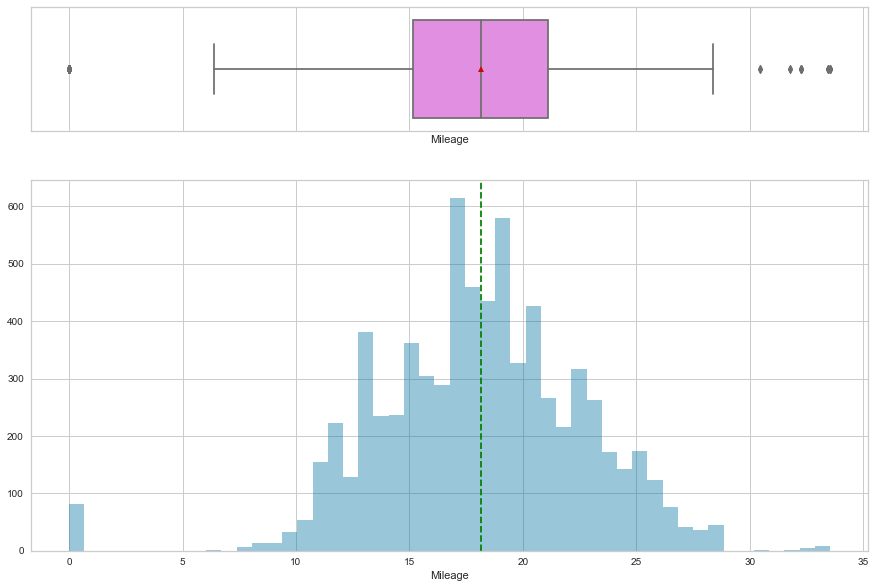

In [383]:
histogram_boxplot(data['Mileage'])

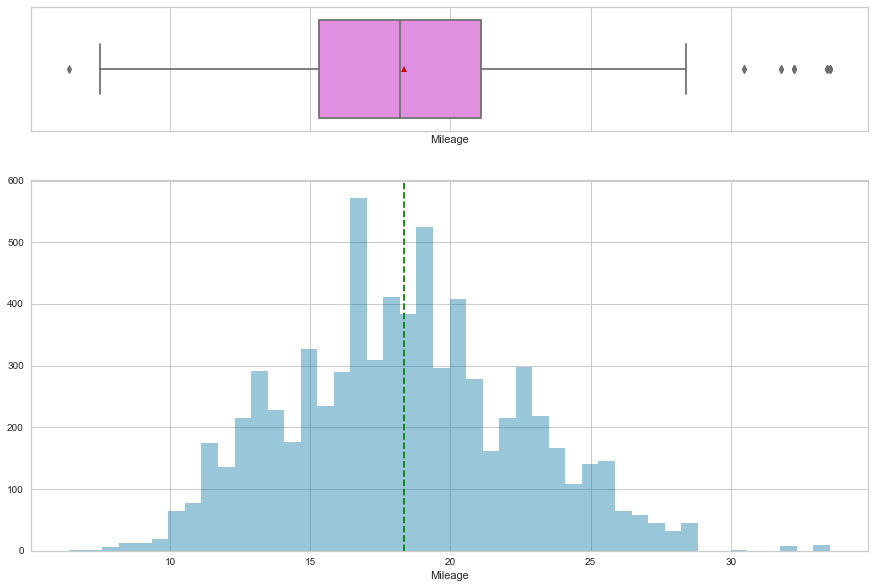

In [384]:

data.loc[data['Mileage'] == 0, 'Mileage'] = None
histogram_boxplot(data['Mileage'])


In [385]:
# Impute missing Mileage. For example use can use median or any other methods.
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)

**Missing values for Engine**

In [386]:
data['Engine'].fillna(data['Engine'].median(), inplace=True)

**Missing values for Power**

In [387]:
data['Power'].fillna(data['Power'].median(), inplace=True)

**Seats to Categorical**

In [388]:
data['Seats'] = pd.Categorical(data.Seats)


**Missing values for New_price**

In [389]:
data['New_price'].fillna(data['New_price'].median(), inplace=True)

#### **Observations for missing values after imputing: **

All missing values for predictor variables have been imputed. 

In [391]:
data.to_csv("..\\Public_Datasets\\used_cars_milestone_1.csv")

# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [392]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#for tuning the model
from sklearn.model_selection import GridSearchCV


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

In [393]:
# drop observations missing the dependent values 
cars_data = data[data["Price"].notna()]
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   6018 non-null   object  
 1   Location               6018 non-null   object  
 2   Year                   6018 non-null   int64   
 3   Kilometers_Driven      6018 non-null   int64   
 4   Fuel_Type              6018 non-null   object  
 5   Transmission           6018 non-null   object  
 6   Owner_Type             6018 non-null   object  
 7   Mileage                6018 non-null   float64 
 8   Engine                 6018 non-null   float64 
 9   Power                  6018 non-null   float64 
 10  Seats                  5976 non-null   category
 11  New_price              6018 non-null   float64 
 12  Price                  6018 non-null   float64 
 13  kilometers_driven_log  6018 non-null   float64 
 14  price_log              6018 non-null   f

There are 6,018 observations with dependent values that are not null.

### **Split Data**

<li>Step1: Split the data into X and Y . 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

<b>Think about it:</b> Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [394]:

y = cars_data[['Price', 'price_log']]
X = cars_data.drop(['Name', 'Price', 'price_log', 'Kilometers_Driven'],axis=1)
X1 = pd.get_dummies(X)
X = X1.drop(['Transmission_Automatic', 'New_price'], axis=1)

In [395]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape)


(4212, 275) (1806, 275)


<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### Function to score RMSE and R^2 for model(s) 


In [396]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
# the categorical column as the input and returns the boxplots and histograms for the variable.
def get_model_score(model, flag = True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train['price_log'], pred_train)
    test_r2=metrics.r2_score(y_test['price_log'], pred_test)
    train_rmse=metrics.mean_squared_error(y_train['price_log'], pred_train, squared=False)
    test_rmse=metrics.mean_squared_error(y_test['price_log'], pred_test, squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train['price_log'], pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test['price_log'], pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['price_log'], pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['price_log'], pred_test)))
    
    # returning the list with train and test scores
    return score_list

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [397]:
# Create a linear regression model
lr = LinearRegression()       

In [398]:
# Fit linear regression model
lr.fit(X_train, y_train['price_log']) 

LinearRegression()

In [399]:
s = get_model_score(lr)

R-square on training set :  0.9590150047770909
R-square on test set :  0.9562269796881682
RMSE on training set :  0.17634758086544935
RMSE on test set :  0.1838694360849027


#### **Observations from results: **

The R-square values is ~0.95 so the independent variables explain the variance in the dependent variable well. The MSE on the training and test datasets are close so the model is fitted well. 

#### **Important variables of Linear Regression**

Building a model using statsmodels

In [400]:
# Add constant for test and train
x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)


In [401]:

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     397.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:36:07   Log-Likelihood:                 1332.5
No. Observations:                4212   AIC:                            -2195.
Df Residuals:                    3977   BIC:                            -703.8
Df Model:                         234                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -132.7981      1.879    -70.692      0.000    -136.481    -129.115
Year                          0.1074      0.001     72.012      0.000       0.105       0.110
Mileage                       0.0021      0.002      1.178      0.239      -0.001       0.006
Engine                    -7.963e-05   2.19e-05     -3.632      0.000      -0.000   -3.67e-05
Power                         0.0024      0.000     10.524      0.000       0.002       0.003
kilometers_driven_log        -0.0731      0.006    -13.017      0.000      -0.084      -0.062
Location_Ahmedabad          -12.0835      0.171    -70.687      0.000     -12.419     -11.748
Location_Bangalore          -11.9004      0.171    -69.579      0.000     -12.236     -11.565
Location_Chennai            -12.0246      0.171    -70.515      0.000     -12.359     -11.690
Location_Coimbatore         -11.9318      0.173    -69.056      0.000     -12.271     -11.593
Location_Delhi              -12.1664      0.171    -71.120      0.000     -12.502     -11.831
Location_Hyderabad          -11.9361      0.171    -70.001      0.000     -12.270     -11.602
Location_Jaipur             -12.1043      0.171    -70.743      0.000     -12.440     -11.769
Location_Kochi              -12.1017      0.173    -70.050      0.000     -12.440     -11.763
Location_Kolkata            -12.3048      0.170    -72.498      0.000     -12.638     -11.972
Location_Mumbai             -12.1353      0.170    -71.262      0.000     -12.469     -11.801
Location_Pune               -12.1092      0.171    -70.857      0.000     -12.444     -11.774
Fuel_Type_CNG               -29.7122      0.420    -70.694      0.000     -30.536     -28.888
Fuel_Type_Diesel            -29.6444      0.420    -70.638      0.000     -30.467     -28.822
Fuel_Type_Electric          -13.9533      0.214    -65.132      0.000     -14.373     -13.533
Fuel_Type_LPG               -29.7375      0.426    -69.792      0.000     -30.573     -28.902
Fuel_Type_Petrol            -29.7507      0.420    -70.778      0.000     -30.575     -28.927
Transmission_Manual          -0.1190      0.010    -11.620      0.000      -0.139      -0.099
Owner_Type_First            -33.1177      0.473    -70.029      0.000     -34.045     -32.191
Owner_Type_Fourth & Above   -33.2528      0.471    -70.576      0.000     -34.177     -32.329
Owner_Type_Second           -33.1716      0.471    -70.373      0.000     -34.096     -32.247
Owner_Type_Third            -33.2560      0.470    -70.833      0.000     -34.176     -32.336
Seats_2.0                    -0.6587      0.263     -2.501      0.012      -1.175      -0.142
Seats_4.0                    -0.1016      0.057     -1.777      0.076      -0.214       0.010
Seats_5.0                    -0.1233      0.037     -3.370      0.001      

In [402]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [403]:
# Filter by significant p-value (pval <0.05) 
olsmod = olsmod.sort_values(by="pval", ascending=True)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
const,-132.798060,0.000000
Model_compass,-2.768164,0.000000
Brand_audi,-4.358133,0.000000
Brand_bmw,-4.370338,0.000000
Brand_datsun,-5.280760,0.000000
...,...,...
Model_i20,0.275090,0.025803
Model_xuv500,0.085965,0.029080
Model_versa,-0.426373,0.030072
Model_eon,-0.251518,0.043919


In [404]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Brand', 'Owner_Type', 'Year', 'Location', 'Fuel_Type', 'kilometers_driven_log', 'Transmission', 'Power', 'Engine', 'Seats']


<b>Build Ridge / Lasso Regression similar to Linear Regression:</b><br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [405]:
from sklearn.linear_model import Ridge

In [406]:
# Create a Ridge regression model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train['price_log'])

s = get_model_score(ridge)

R-square on training set :  0.9564589157005537
R-square on test set :  0.9585877817837799
RMSE on training set :  0.1817635021833391
RMSE on test set :  0.1788424184745317


# Observations

We built three different linear regression models and all three had very similar results. The linear model is giving good generalized performance. The validation set performed well and the model is successful in making predictions.

The R-squared metric gives us an indication that how good/bad our model is from a baseline model. Here, we have explained ~95% variance in the data as compared to the baseline model when there is no independent variable.



## Ridge tuning

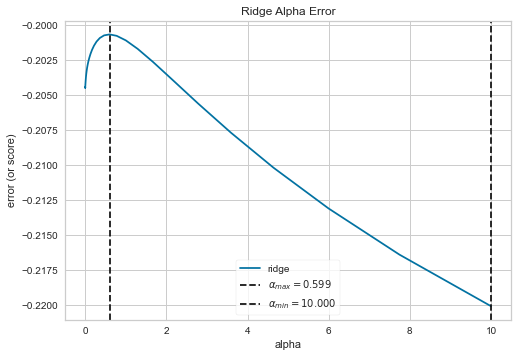

In [407]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 100)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    ridge,
    alphas=alphas,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

visualizer.fit(X_train, y_train['price_log'])
visualizer.show();

In [408]:
# Create a Ridge regression model
ridgeTuned = Ridge(alpha=0.599)
ridgeTuned.fit(X_train, y_train['price_log'])

s = get_model_score(ridgeTuned)

R-square on training set :  0.957469668998052
R-square on test set :  0.9587376939425397
RMSE on training set :  0.1796414051141577
RMSE on test set :  0.1785184203668056


### **Decision Tree** 

[Scikit Regression Tree](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

In [409]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(random_state=1)

In [410]:
# Fit decision tree regression model.
dtree.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [411]:
# Get score of the model on validation set.
s = get_model_score(dtree)


R-square on training set :  0.9999903038539666
R-square on test set :  0.8823973728807508
RMSE on training set :  0.00271241811318959
RMSE on test set :  0.301380257105048


#### **Observations from results: **

The R^2 value is lower than linear regression on the validation set. 

Print the importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


In [412]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.604020
Year                   0.233091
Engine                 0.051928
kilometers_driven_log  0.014982
Mileage                0.010828
...                         ...
Model_koleos           0.000000
Model_1000             0.000000
Model_800              0.000000
Model_a                0.000000
Model_f                0.000000

[275 rows x 1 columns]


### **Random Forest**

[Scikit Regression for Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [413]:
# Create a Randomforest regression model 
rf = RandomForestRegressor(random_state=1)

# Fit Randomforest regression model.
rf.fit(X_train, y_train['price_log'])

RandomForestRegressor(random_state=1)

In [414]:
# Get score of the model.
s = get_model_score(rf)

R-square on training set :  0.9906733169275513
R-square on test set :  0.9458400545816557
RMSE on training set :  0.084124146626818
RMSE on test set :  0.20452452668047919


#### **Observations and insights: **

The R^2 value for the random forest regressor is a little higher than linear regression on the validation set. 

**Feature Importance**

In [415]:
# Print important features similar to decision trees
print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.610415
Year                   0.232131
Engine                 0.038163
kilometers_driven_log  0.018007
Mileage                0.013368
...                         ...
Model_platinum         0.000000
Model_xe               0.000000
Model_a7               0.000000
Model_1000             0.000000
Model_beetle           0.000000

[275 rows x 1 columns]


#### **Observations and insights: **

The important features are consistent with the decision tree. The most important features are Power, Year, Engine, Kilometers Driven, and Mileage. 

### **Hyperparameter Tuning: Decision Tree**

In [416]:
from sklearn.metrics import mean_squared_error

# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from.
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring='neg_mean_absolute_error')
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, random_state=1)

In [417]:
# Get score of the dtree_tuned
print('Training score: ', dtree_tuned.score(X_train, y_train['price_log']))
print('Validation score: ', dtree_tuned.score(X_test, y_test['price_log']))

Training score:  0.9330136863105668
Validation score:  0.8913132805709938


#### **Observations and insights: **

We improved the R^2 score for the decision tree from 0.79 to 0.89 with this tuning. 

In [418]:
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.645640
Year                   0.243907
Engine                 0.051097
Mileage                0.012330
kilometers_driven_log  0.007765
...                         ...
Model_countryman       0.000000
Model_cr-v             0.000000
Model_crosspolo        0.000000
Model_cruze            0.000000
Model_zest             0.000000

[275 rows x 1 columns]


### **Hyperparameter Tuning: Random Forest**

In [419]:
# Create a Randomforest regression model 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                "n_estimators": [100, 110, 120],
                "max_depth": [5, 6, 7],
                "max_features": [0.8, 0.9, 1]
             }

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='neg_mean_absolute_error')
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train,y_train['price_log'])


RandomForestRegressor(max_depth=7, max_features=0.8, random_state=1)

In [420]:
# Get score of the model.
print('Training score: ', rf_tuned.score(X_train, y_train['price_log']))
print('Validation score: ', rf_tuned.score(X_test, y_test['price_log']))

Training score:  0.9333065757339042
Validation score:  0.9152621667241577


#### **Observations and insights: **

The tuned random forest model has a good fit and the best validation R^2 score. 

**Feature Importance**

In [421]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.558486
Year                   0.234791
Engine                 0.106113
Transmission_Manual    0.032110
kilometers_driven_log  0.010634
...                         ...
Brand_smart            0.000000
Model_ritz             0.000000
Model_renault          0.000000
Model_redi-go          0.000000
Model_6                0.000000

[275 rows x 1 columns]


## Comparing Models


## Function to compute R^2 and RMSE for list of models 


In [422]:
# defining list of models ypu have trained
models = [lr, ridge, ridgeTuned, dtree, dtree_tuned, rf, rf_tuned]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model, False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [424]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression', 'Ridge', 'Ridge Tuned','Decision Tree','Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.959015,0.956227,0.176348,0.183869
1,Ridge,0.956459,0.958588,0.181764,0.178842
2,Ridge Tuned,0.957470,0.958738,0.179641,0.178518
3,Decision Tree,0.999990,0.882397,0.002712,0.301380
4,Decision Tree Tuned,0.933014,0.891313,0.225450,0.289731
5,Random Forest,0.990673,0.945840,0.084124,0.204525
6,Random Forest Tuned,0.933307,0.915262,0.224957,0.255826


**Refined insights**:

As we built the models, we were able to interpret the results and expand on our insights from exploratory phase. From the linear models, we found the top five most significant predictors were Year, Power, Location of Kolkata, Mileage, and Manual Transmission. From the decisions tree and random forest models, we found the top five in ascending order were Power, Year, Engine, Kilometers Driven, and Mileage. These five predictors were consistent across our decision tree, tuned decision tree, and random forest models. The tuned random forest model had Power, Year, Engine, Manual Transmission, and Kilometers Driven.

**Comparison of various techniques and their relative performance**:

The linear regression model performed very well on the first iteration. The train and test R^2 and RMSE metrics were close and that means the models was fitted well. We built a ridge regularization model next and to see if we see if our previous model was too complex. The results validated that our first linear model was good because the metrics were about the same and showed the model fit the test data well.  

The decision tree model had metrics that were much better on the training dataset than the validation set. We improved this model through hyper-tuning parameters. The first parameter we used to turn was max depth and we looked at tree depths from 2 to 10. The second parameter we used for tuning was minimum number of samples required at a leaf. The search through different parameters found the model was best optimized at max depth of 9 and minimum at leaf to be 5. 

The random forest model had worse performance on the validation set and showed to be overfit. We improved this model through hyper-tuning. The first parameter is �n_estimators� which is the number of trees in the forest. The more trees you create the better the performance of the model, however, it comes at a cost of processing time. The second parameter was max depth and we looked at depths from 5, 6, and 7. The third parameter was maximum features where we ran the model with 0.8, 0.9, and 1.  The model was optimized at 120 trees, with depth of 7, and features at 0.8. 

Linear regression and the tuned random forest models both had similar results with small differences between R^2 and the RMSE. 


**Proposal for the final solution design**:

The initial model selected as the most consistent and successful is Linear Regression. The Random Forest model had higher R^2 and lower errors for validation but the test data was strongly overfit. I am not confident that those strong validation numbers represent future predictions on data that has not been seen. We still have a lot of feature engineering and hyper-tuning to consider, and, at some point, the Tuned Random Forest model holds much promise. We can continue to improve Linear Regression with feature engineering and removing non-significant predictors. 

**Key recommendations for implementation**: 

We should implement the simplest model that is as accurate as more complex models. By doing this, the amount of data collection for predictors could be limited and we would be able to efficiently predict future used car prices. The model is currently making accurate prediction and is useful helping us build the business. We can continually improve the models with more predictive features, less complexity, and hyper-tuning. 